In [3]:
%matplotlib inline
from mxnet.gluon import data as gdata
from IPython import display
import matplotlib.pyplot as plt
import time 
from mxnet import autograd, nd

In [2]:
%pip install mxnet

     |████████████████████████████████| 54.7MB 74kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


### Define constants

In [4]:
num_inputs = 784
num_outputs = 10
batch_size = 256
num_workers = 4
num_epochs = 10
learning_rate = 0.1

### Create MNIST dataset

In [5]:
mnist_train = gdata.vision.FashionMNIST(train=True)

mnist_test = gdata.vision.FashionMNIST(train=False)

transformer = gdata.vision.transforms.ToTensor()

train_iter = gdata.DataLoader(mnist_train.transform_first(transformer), batch_size, shuffle=True, num_workers=num_workers)

test_iter = gdata.DataLoader(mnist_test.transform_first(transformer), batch_size, shuffle=False, num_workers=num_workers)

### Display images

In [6]:
def show_fashion_mnist(images, labels):
    display.set_matplotlib_formats('svg')
    _, figs = plt.subplots(1, len(images), figsize = (12, 12))
    for fig, image, label in zip(figs, images, labels):
        fig.imshow(image.reshape((28, 28)).asnumpy())
        fig.set_title(label)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)

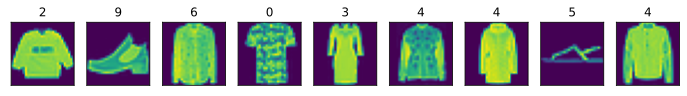

In [7]:
X, y = mnist_train[0:9]
show_fashion_mnist(X, y)

### Define softmax function

In [8]:
def softmax(X):
    x_exp = X.exp()
    partition = x_exp.sum(axis = 1, keepdims = True)
    return x_exp / partition

### Define neural network

In [9]:
def net(X, w, b):
    Y = nd.dot(X.reshape((-1, num_inputs)), w) + b
    return softmax(Y)

### Define cross entropy function

In [10]:
def cross_entropy(y_hat, y):
    return  -nd.pick(y_hat, y).log()

### Define SGD function

In [11]:
def sgd(params, lr, batch_size):
    for i in range(len(params)):
        nd.elemwise_sub(params[i], lr * params[i].grad / batch_size, out=params[i])

## Train data

In [12]:
w = nd.random.normal(scale=1.0, shape=(num_inputs, num_outputs))
b = nd.zeros(num_outputs)
w.attach_grad()
b.attach_grad()
loss = cross_entropy
# Train models
for epoch in range(1, num_epochs + 1):
    start = time.time()
    acc_sum, n = 0.0, 0
    total = float(len(mnist_train))
    for X, y in train_iter:
        with autograd.record():
            y_hat = net(X, w, b)
            l = loss(y_hat, y).sum()
        l.backward()
        sgd([w, b], learning_rate, batch_size)
        acc_sum += (y_hat.argmax(axis=1) == y.astype('float32')).sum().asscalar()
    print("Epoch:%d Elapsed time:%.2f accuracy:%.2f%%" % (epoch, time.time() - start, (acc_sum / total) * 100))

Epoch:1 Elapsed time:6.00 accuracy:45.69%
Epoch:2 Elapsed time:6.26 accuracy:63.49%
Epoch:3 Elapsed time:6.25 accuracy:68.20%
Epoch:4 Elapsed time:5.99 accuracy:70.63%
Epoch:5 Elapsed time:6.17 accuracy:72.25%
Epoch:6 Elapsed time:5.97 accuracy:73.48%
Epoch:7 Elapsed time:5.88 accuracy:74.33%
Epoch:8 Elapsed time:6.10 accuracy:75.02%
Epoch:9 Elapsed time:6.07 accuracy:75.70%
Epoch:10 Elapsed time:5.89 accuracy:76.05%


### Predict data and display images

In [13]:
def get_fashion_mnist_labels(labels):
    text_Labels =['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_Labels[int(i)] for i in labels]

In [14]:
for item in test_iter:
    true_labels = get_fashion_mnist_labels(y.asnumpy())
    pred_labels = get_fashion_mnist_labels(net(X, w, b).argmax(axis=1).asnumpy())
    break

In [15]:
titles = [true + "\n" + pred for true, pred in zip(true_labels, pred_labels)]

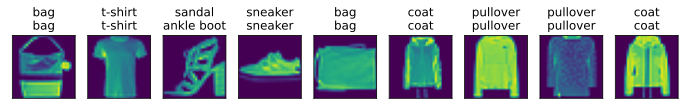

In [16]:
show_fashion_mnist(X[0:9], titles[0:9])